# 추세와 정상 확률 과정

## 추세

확률 과정의 기대값이 시간 인덱스 $t$에 대한 함수로 표현될 수 있으면 이를 **추세(trend)**라고 한다.

$$ \mu_t = \text{E}[Y_t] = f(t) $$

보통은 추세 함수 $f(t)$가 상수가 아니라 $t$에 따라 변화하는 경우, **추세를 가진다**고 말한다. 
이 추세는 확률 변수가 아닌 함수로 표현할 수 있기 때문에 **결정론적 추세(deterministic trend)**라고도 한다.

다음 시계열들은 모두 추세를 가지는 확률 과정의 샘플이다.

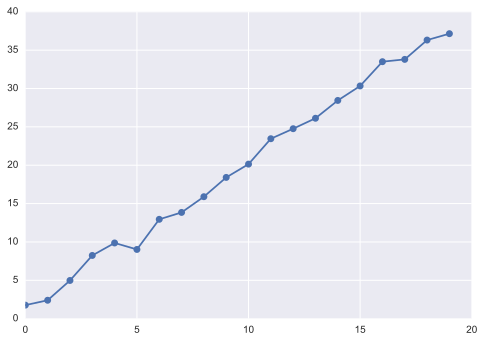

In [1]:
np.random.seed(0)
t = np.arange(20)
x = 2 * t + sp.stats.norm.rvs(size=20)
plt.plot(t, x, 'o-');

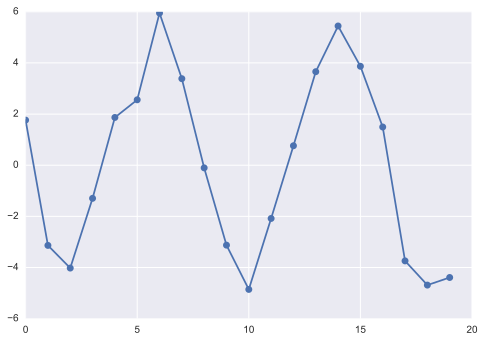

In [2]:
np.random.seed(0)
t = np.arange(20)
x = -5*np.sin(0.25*np.pi*t) + sp.stats.norm.rvs(size=20)
plt.plot(t, x, 'o-');

다시 말하지만 확률 과정의 기댓값은 앙상블(Ensemble) 개념이므로 앞으로 이야기할 정상 가정과 에르고딕 가정이 없다면  **하나의 샘플에서 추세가 있다고 판단하거나 추세를 추정하는 것은 원리적으로 불가능하다**. 이러한 가정 없이 추세를 추정하기 위해서는 다음과 같이 복수개의 시계열 자료 샘플이 있어야 한다.

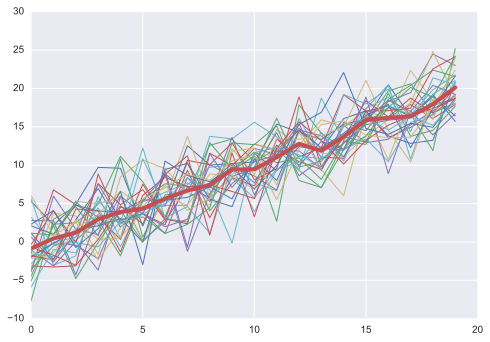

In [3]:
np.random.seed(0)
t = np.arange(20)
y = np.zeros((30, 20))
for i in range(30):
    y[i,:] = t + 3 * sp.stats.norm.rvs(size=20)
    plt.plot(t, y[i], lw=1);
plt.plot(t, np.mean(y, axis=0), 'r-', lw=4);    

## 정상 확률 과정

**협의의 정상 확률 과정(strictly stationary process, strong stationary process)**은 확률 과정의 모든 모멘트(moment)가 시간 차이(time lag)에만 의존하고 절대 시간에 의존하지 않는 것이다.

이를 수학적으로 표현하면 임의의 $t$, $s$, $k_i$에 대해 
$$ \text{E}[X_{t} X_{t+k_1} X_{t+k_2} \cdots X_{t+k_i} \cdots ] = \text{E}[X_s X_{s+k_1} X_{s+k_2} \cdots X_{s+k_n} \cdots] $$ 
가 성립한다.

즉. 기댓값의 경우
$$ \text{E}[X_{t}] = \text{E}[X_{s}] = \mu $$ 
가 성립하고 

자기공분산의 경우
$$ \text{E}[X_{t}X_{t+k}] = \text{E}[X_{s}X_{s+k}] = f(k) $$ 
가 성립한다.

위 두가지 조건만 성립하는 경우에는 **광의의 정상 확률 과정(wide-sense stationary procee, weak strationary process)**라고 한다.

**정상 확률과정에서는 자기공분산이 두 시간 인덱스의 차이 즉 시차(lag) $k$에만 의존하므로** 자기공분산을 다음과 같이 표기하며 시차에 대한 1차원 함수가 된다. 따라서 자기공분산함수(auto covariance function)라고도 한다.

$$ \gamma_{t,t+l} =  \gamma_{0,k} \triangleq  \gamma_k $$

정상 확률 과정의 자기상관계수도 마찬가지로 시차 $k$에만 의존한다. 이를 자기상관계수 함수(auto-correlation function) 줄여서 ACF라고 한다.

$$ \rho_{t,t+k} = \rho_{0,k} \triangleq \rho_k = \dfrac{\gamma_k}{\gamma_0} $$

정상 확률 과정은 다음과 같은 성질을 만족한다.

$$
\begin{eqnarray}
\gamma_0 &=& \text{Var}[Y_t] \\
\gamma_{k} &=& \gamma_{-k} \\
\left| \gamma_{k} \right| &\leq& \gamma_{0}  \\
\rho_{0} &=& 1 \\
\rho_{k} &=& \rho_{-k} \\
\left| \rho_{k} \right| &\leq& 1 \\
\end{eqnarray}
$$

## 에르고딕 확률 과정

정상 확률 과정에 대해서는 다음과 같이 에르고딕 성질(ergodicity)을 가정할 수 있다.

에르고딕 확률 과정(ergodic process)은 모멘트에 대한 **시간 평균값이 앙상블 기댓값으로 수렴**하는 정상 확률 과정을 말한다.

기댓값의 경우,

$$ \text{E}[Y_t] = \lim_{T \rightarrow \infty} \dfrac{1}{T} \int_0^T Y_t dt $$

자기공분산의 경우

$$ \text{E}[X_{t}X_{t+k}] = \lim_{T \rightarrow \infty} \dfrac{1}{T} \int_0^T Y_t Y_{t+k} dt $$

가 성립한다.

에르고딕 확률 과정에 대해서는 하나의 샘플 즉 시계열 자료만 가지고도 기댓값과 자기공분산을 추정할 수 있기 때문에 대부분의 시계열 분석에서는 특별히 명시하지 않더라도 에르고딕 확률 과정을 가정하는 경우가 많다.

다음 파이썬 코드는 에르고딕 확률 과정의 샘플에서 기댓값과 lag 0의 자기공분산을 추정하는 예이다.

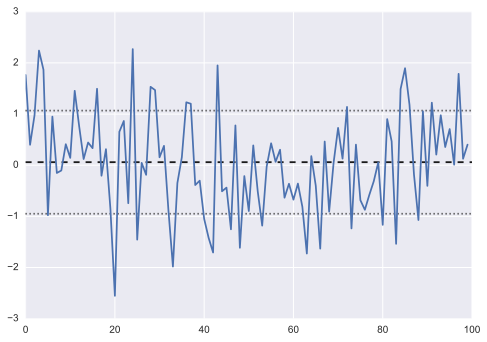

In [4]:
np.random.seed(0)
N = 100
t = np.arange(N)
y = sp.stats.norm.rvs(size=N)
mean = np.mean(y)
var = np.var(y)
plt.plot(t, y)
plt.hlines(mean, 0, N, linestyle='--')
plt.hlines(np.sqrt(var)+mean, 0, N, linestyle=':')
plt.hlines(-np.sqrt(var)+mean, 0, N, linestyle=':')

## 비정상 확률 과정

정상 확률 과정이 아닌 확률 과정이 **비정상 확률 과정(non-stationary process)**이다. 

비정상 확률 과정이 되는 경우는 

* 추세를 가지는 경우. 일차 모멘트 즉, 기댓값 $\text{E}[y_t]$이 0이 아니며 시간에 따라 변화함
* 추세가 없지만 $\text{E}[y_t] = 0 $이지만 분산 $\text{Var}[y_t]$ 이 시간에 따라 변하는 경우

등이 있다. 

이 중 두번째 경우를 살펴보자. 

다음 시계열 자료들은 동일한 확률 과정의 샘플들이다. 하나 하나의 샘플(시계열 자료)만 보면 마치 추세가 있는 것처럼 보인다. 그러나 이는 확률 과정의 분산 $\text{Var}[y_t]$이 시간 $t$에 따라 커지기 때문이다. 그래프에 표시하였듯이 $t=400$에서의 분산 $\text{Var}[y_{400}]$은 $t=100$에서의 분산 $\text{Var}[y_{100}]$보다 크다.


이런 경우 보통 **확률적 추세(stochastic trend)**를 가진다고 말하기도 한다. 그러나 이 용어는 명확한 학술적인 정의는 아니다.

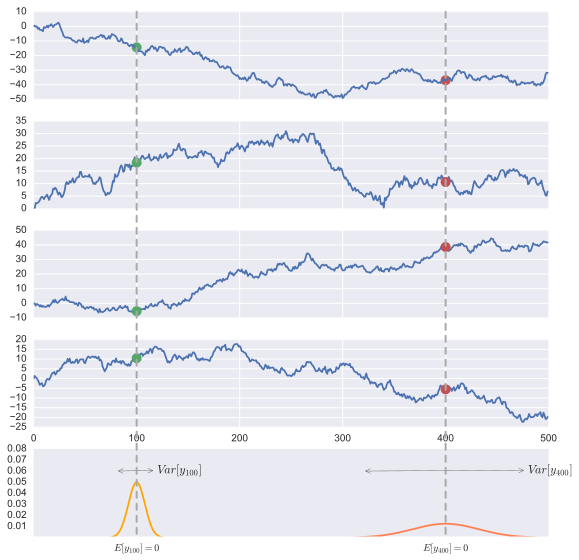

In [37]:
N = 500; t1 = 100; t2 = 400
t = np.arange(N)

np.random.seed(12); y1 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(18); y2 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(22); y3 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(24); y4 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)

plt.figure(figsize=(8,8))

ax1 = plt.subplot(5, 1, 1); plt.plot(t, y1); ax1.set_zorder(2); ax1.set_xticklabels([]); 
ax2 = plt.subplot(5, 1, 2); plt.plot(t, y2); ax2.set_zorder(1); ax2.set_xticklabels([]); 
ax3 = plt.subplot(5, 1, 3); plt.plot(t, y3); ax3.set_zorder(1); ax3.set_xticklabels([]); 
ax4 = plt.subplot(5, 1, 4); plt.plot(t, y4); ax4.set_zorder(1); 

ax5 = plt.subplot(5, 1, 5); ax5.set_zorder(1); ax5.set_xticklabels([]); ax5.grid(False)
ax5.plot(t, sp.stats.norm(t1, 0.08*t1).pdf(t), 'orange')
ax5.plot(t, sp.stats.norm(t2, 0.08*t2).pdf(t), 'coral')
ax5.set_ylim(0.001, 0.08);
ax5.set_xticklabels(["", "$E[y_{100}] = 0$", "", "", "$E[y_{400}] = 0$"])

ax5.annotate("$Var[y_{100}]$", xy=(t1-20, 0.06), xytext=(t1+20, 0.058), arrowprops=dict(arrowstyle="<->"))
ax5.annotate("$Var[y_{400}]$", xy=(t2-80, 0.06), xytext=(t2+80, 0.058), arrowprops=dict(arrowstyle="<->"))


from matplotlib.patches import ConnectionPatch
con1 = ConnectionPatch(xyA=(t1, 10), xyB=(t1,0.001), ls="--", lw=2, color="darkgray", 
                       coordsA="data", coordsB="data", axesA=ax1, axesB=ax5, zorder=2)
ax1.add_artist(con1);
con2 = ConnectionPatch(xyA=(t2, 10), xyB=(t2,0.001), ls="--", lw=2, color="darkgray", 
                       coordsA="data", coordsB="data", axesA=ax1, axesB=ax5)
ax1.add_artist(con2);

ax1.plot(t1, y1[t1], 'o', markersize=10, zorder=1); ax1.plot(t2, y1[t2], 'o', markersize=10, zorder=1);
ax2.plot(t1, y2[t1], 'o', markersize=10); ax2.plot(t2, y2[t2], 'o', markersize=10); 
ax3.plot(t1, y3[t1], 'o', markersize=10); ax3.plot(t2, y3[t2], 'o', markersize=10); 
ax4.plot(t1, y4[t1], 'o', markersize=10); ax4.plot(t2, y4[t2], 'o', markersize=10); 

plt.tight_layout(h_pad=0.1)